Chargement des données...

✓ 30 réplications chargées depuis results_c
✓ 30 réplications chargées depuis results_cpp
✓ 30 réplications chargées depuis results_python

Total : 30 (C) + 30 (C++) + 30 (Python) = 90 fichiers
TEST DE NORMALITÉ (SHAPIRO-WILK)

--- PEAK INFECTED ---
C - peak_infected:
  W = 0.9653, p-value = 0.4198
  ✓ Normal (α=0.05)

C++ - peak_infected:
  W = 0.9697, p-value = 0.5312
  ✓ Normal (α=0.05)

Python - peak_infected:
  W = 0.9645, p-value = 0.4017
  ✓ Normal (α=0.05)


--- PEAK DAY ---
C - peak_day:
  W = 0.8839, p-value = 0.0035
  ✗ Non-normal (α=0.05)

C++ - peak_day:
  W = 0.7855, p-value = 0.0000
  ✗ Non-normal (α=0.05)

Python - peak_day:
  W = 0.8717, p-value = 0.0018
  ✗ Non-normal (α=0.05)


--- MAX EXPOSED ---
C - max_exposed:
  W = 0.9720, p-value = 0.5960
  ✓ Normal (α=0.05)

C++ - max_exposed:
  W = 0.9771, p-value = 0.7430
  ✓ Normal (α=0.05)

Python - max_exposed:
  W = 0.9666, p-value = 0.4499
  ✓ Normal (α=0.05)


--- AUC I ---
C - auc_I:
  W = 0

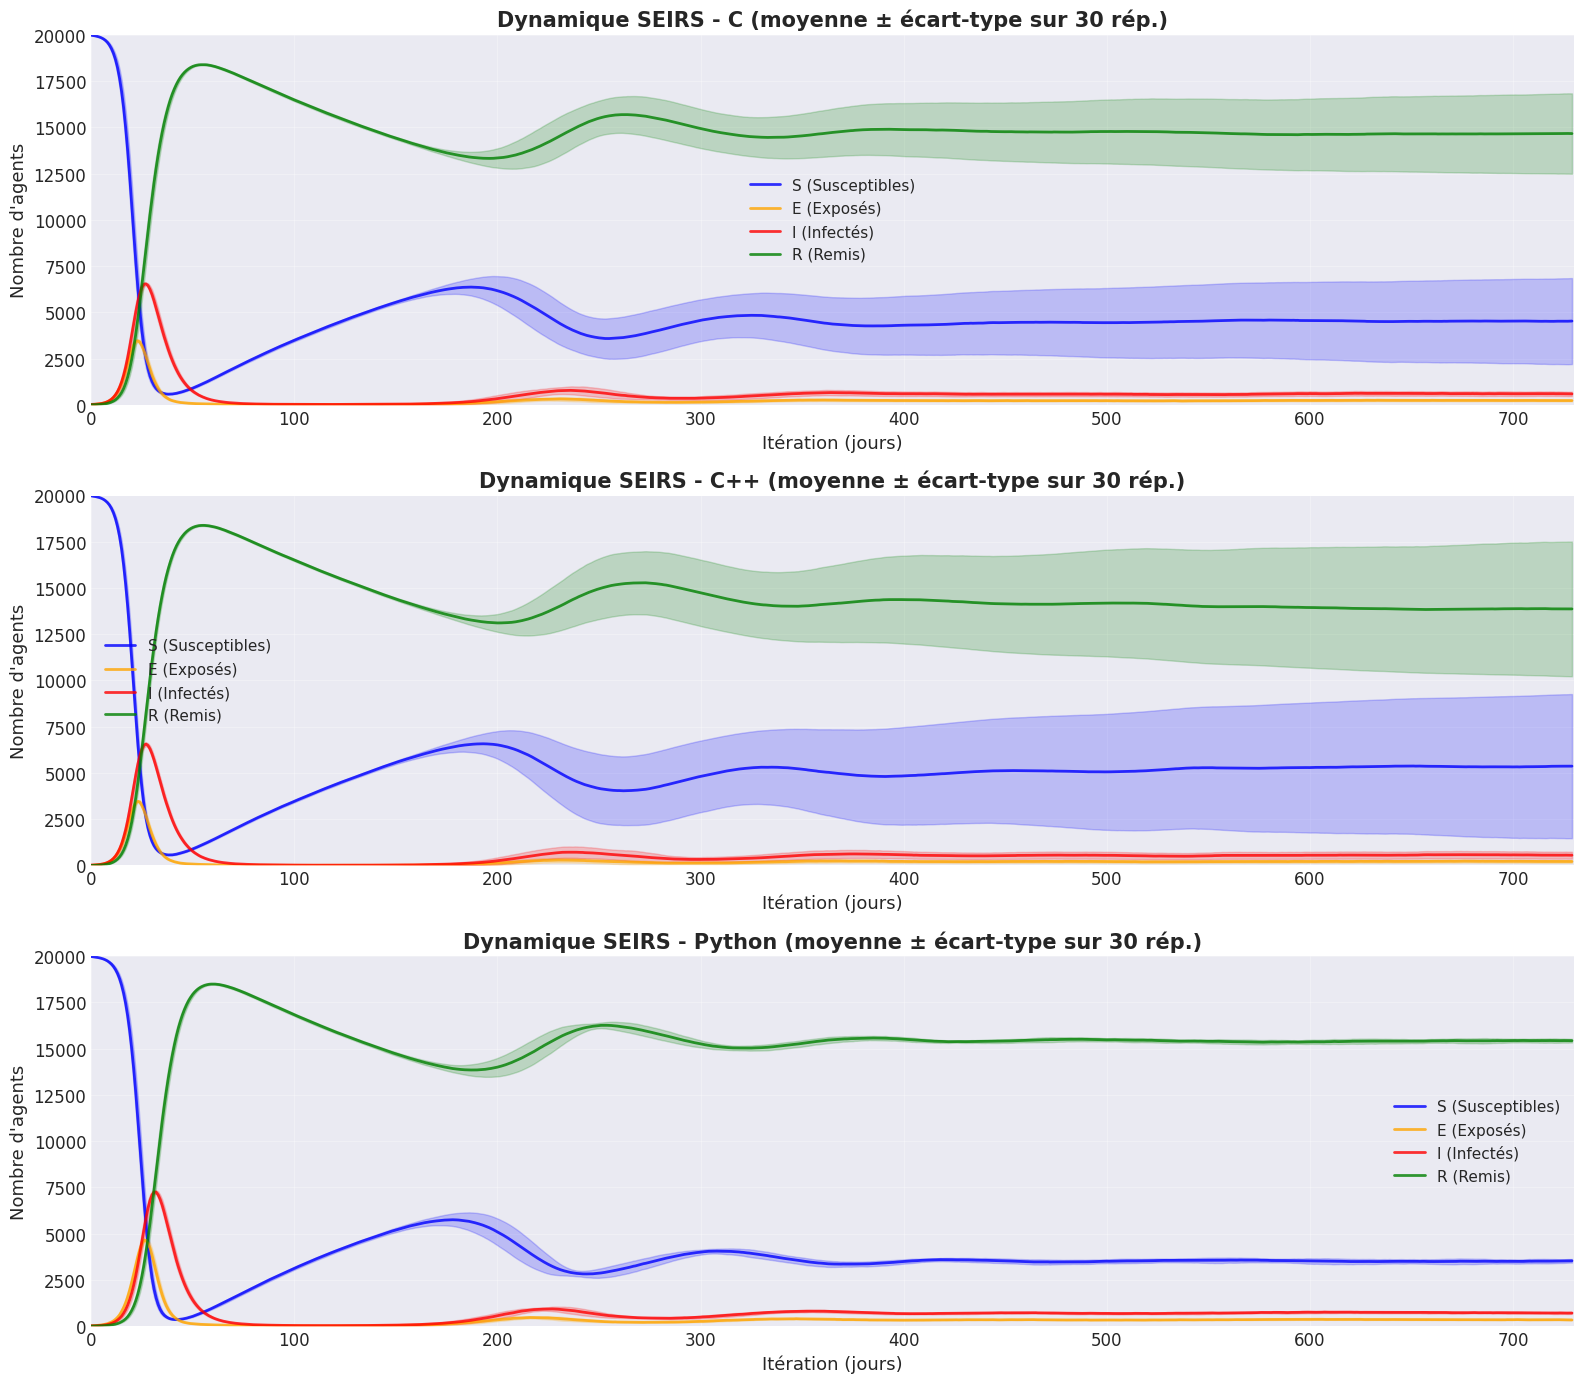

✓ Figure sauvegardée : sma_dynamics_all_languages.png


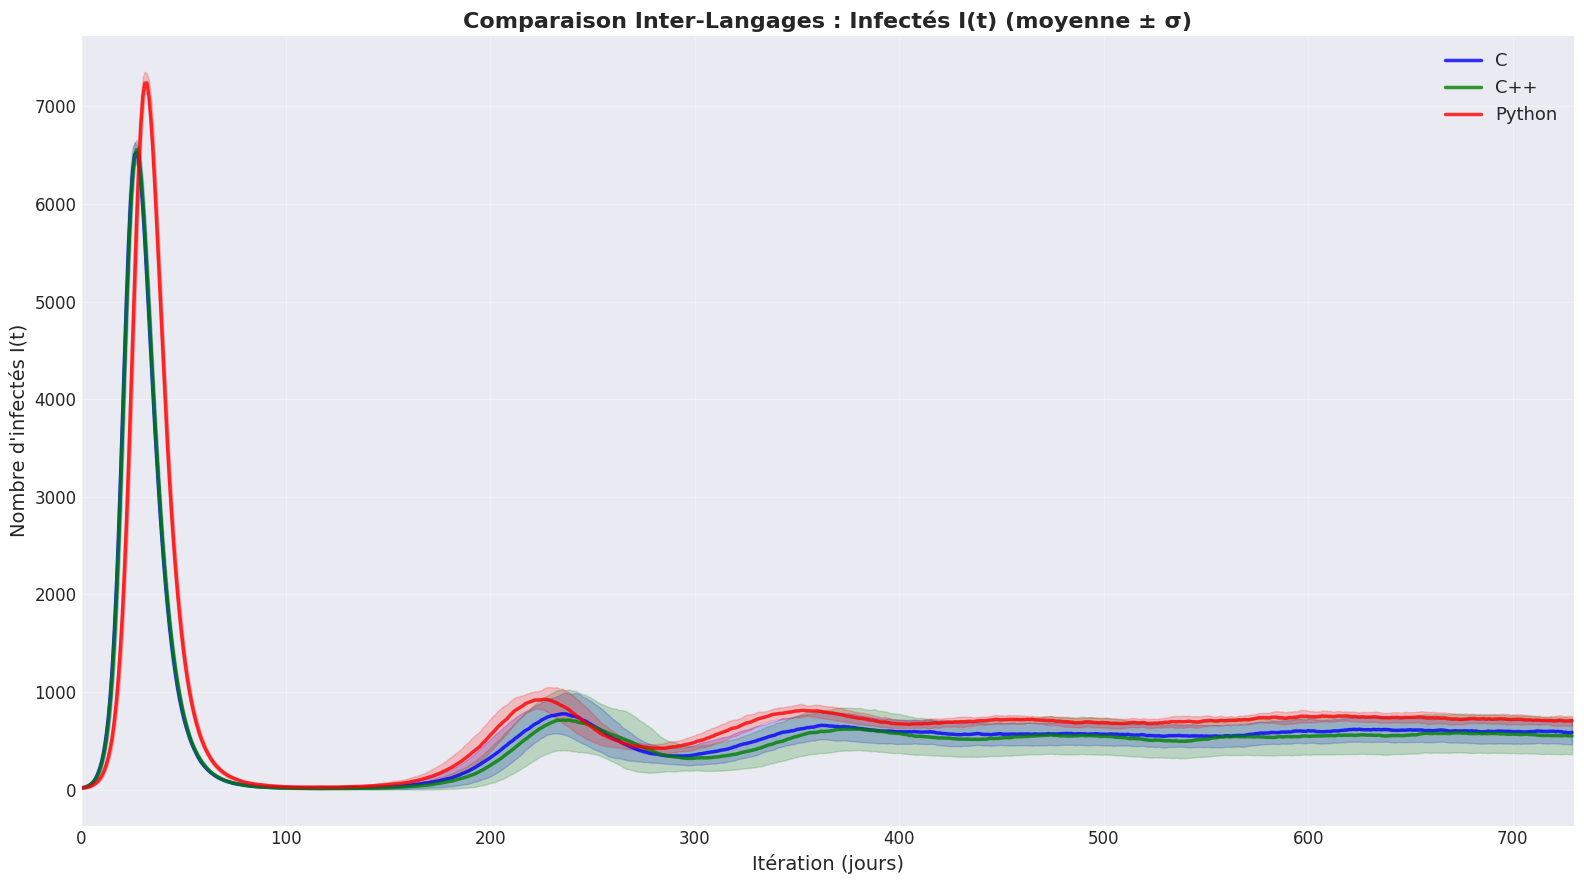

✓ Figure sauvegardée : comparison_infected_languages.png
Extraction des métriques...
✓ Métriques extraites

=== MÉTRIQUES C ===
       peak_infected   peak_day  max_exposed          auc_I
count      30.000000  30.000000    30.000000      30.000000
mean     6586.900000  26.533333  3514.766667  444065.566667
std        73.350058   0.937102    38.864649   58767.678249
min      6401.000000  25.000000  3445.000000  136356.000000
25%      6530.250000  26.000000  3487.750000  448700.000000
50%      6580.500000  26.500000  3513.000000  454408.750000
75%      6631.750000  27.000000  3535.000000  461013.250000
max      6707.000000  28.000000  3604.000000  470663.500000

=== MÉTRIQUES C++ ===
       peak_infected   peak_day  max_exposed          auc_I
count      30.000000  30.000000    30.000000      30.000000
mean     6580.700000  26.833333  3500.233333  422300.533333
std        96.640874   0.647719    48.263418   97723.763151
min      6396.000000  26.000000  3367.000000  135391.000000
25%      

/tmp/ipykernel_34148/1814584536.py:415: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  'auc_I': np.trapz(I_values, df['iteration'])
/tmp/ipykernel_34148/1814584536.py:569: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data, labels=['C', 'C++', 'Python'], patch_artist=True)
/tmp/ipykernel_34148/1814584536.py:569: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data, labels=['C', 'C++', 'Python'], patch_artist=True)
/tmp/ipykernel_34148/1814584536.py:569: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  

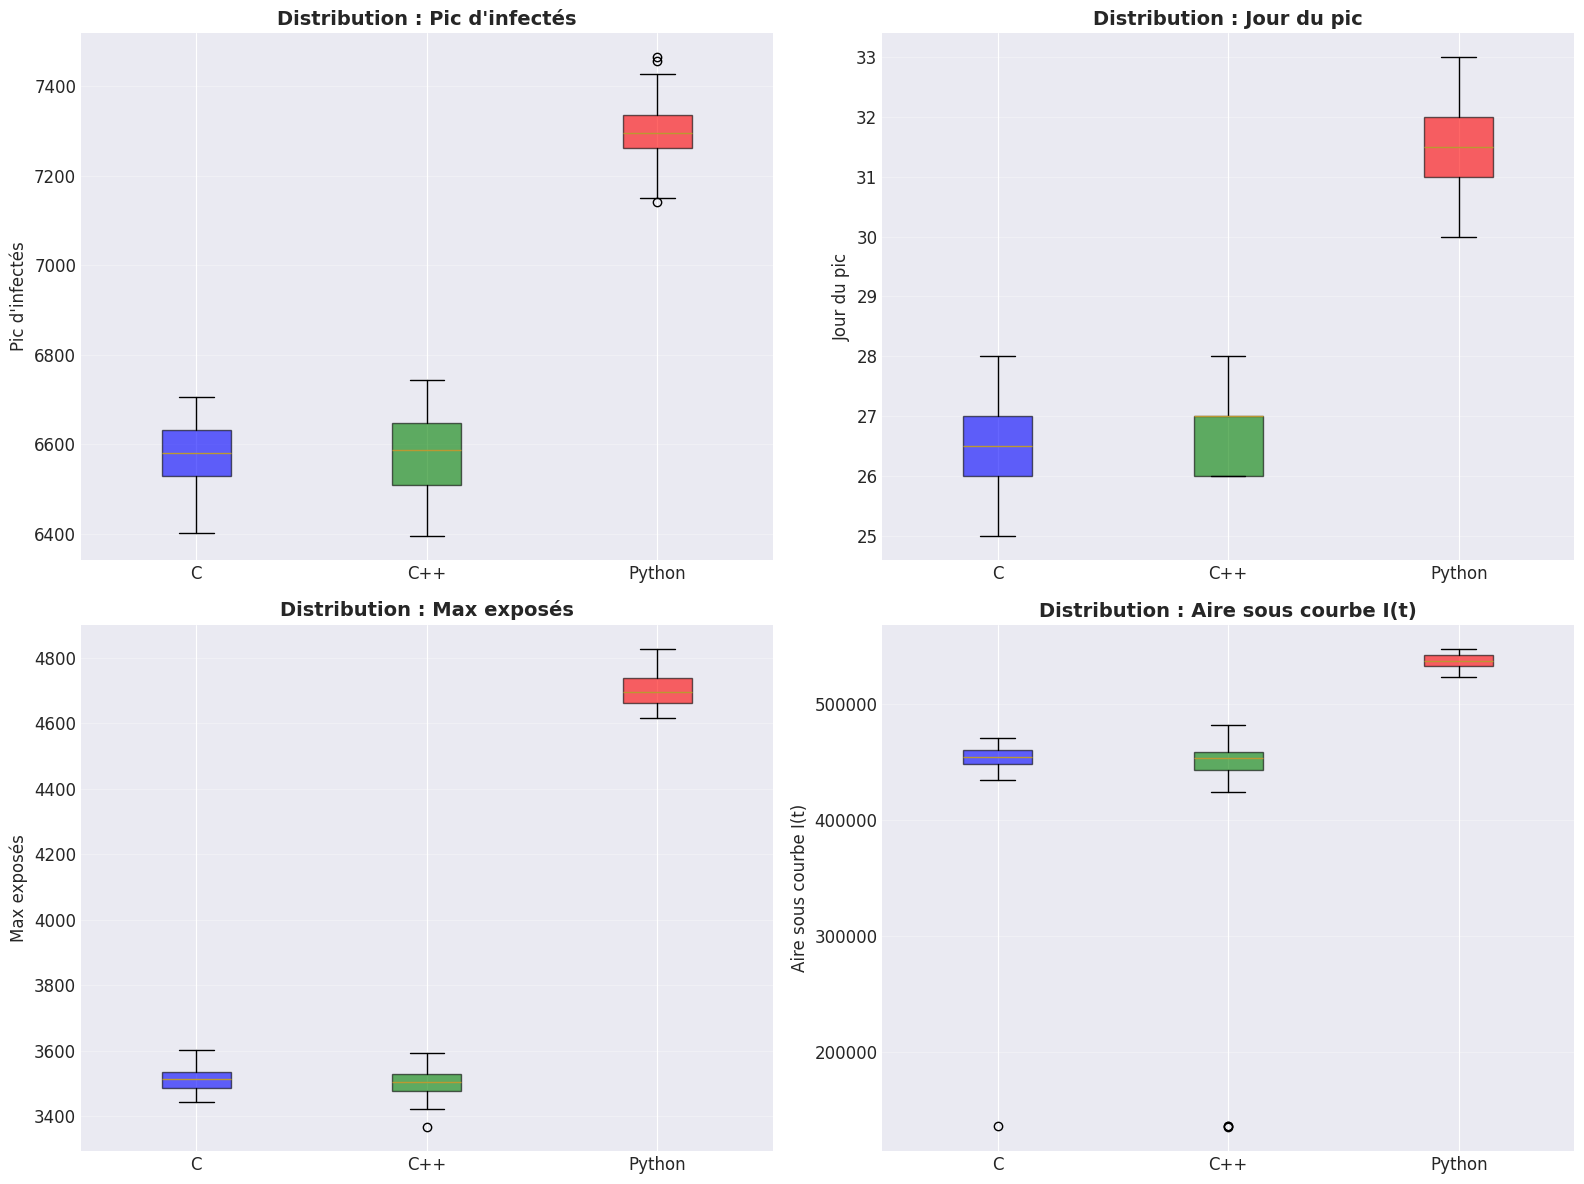

✓ Figure sauvegardée : distributions_metrics.png
✓ Tableau de synthèse exporté : summary_partie2.csv

  Langage  Pic I (moyenne)  Pic I (std)  Jour pic (moyenne)
0       C      6586.900000    73.350058           26.533333
1     C++      6580.700000    96.640874           26.833333
2  Python      7296.033333    82.874431           31.500000

✓ ANALYSE PARTIE 2 TERMINÉE AVEC SUCCÈS

Fichiers générés :
  - sma_dynamics_all_languages.png
  - comparison_infected_languages.png
  - distributions_metrics.png
  - summary_partie2.csv

✅ Prêt pour la rédaction du rapport (Partie 2)


In [ ]:
"""
=============================================================================
PROJET M2 - PARTIE 2 : ANALYSE STATISTIQUE SMA
=============================================================================
Jupyter Notebook pour l'analyse comparative des 3 langages (C, C++, Python)

OBJECTIFS :
1. Charger les 90 fichiers CSV (30 × 3 langages)
2. Calculer les moyennes et écarts-types
3. Visualiser la dynamique SEIRS multi-agent
4. Tests statistiques (ANOVA / Kruskal-Wallis)
5. Répondre : Les 3 langages donnent-ils les mêmes résultats ?
=============================================================================
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import glob
import os


# Configuration graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12


def load_replications(directory: str, pattern: str) -> list:
    """
    Charge toutes les réplications d'un langage.
    
    Parameters:
    -----------
    directory : str
        Dossier contenant les CSV
    pattern : str
        Motif de recherche (ex: 'results_C_rep_*.csv')
    
    Returns:
    --------
    list of pd.DataFrame
        Liste des 30 DataFrames
    """
    files = sorted(glob.glob(os.path.join(directory, pattern)))
    
    if len(files) == 0:
        print(f"⚠️  AVERTISSEMENT : Aucun fichier trouvé dans {directory} avec pattern {pattern}")
        return []
    
    replications = []
    for file in files:
        df = pd.read_csv(file)
        replications.append(df)
    
    print(f"✓ {len(files)} réplications chargées depuis {directory}")
    return replications

# Charger les données
print("Chargement des données...")
print()

reps_c = load_replications('results_c', 'results_C_rep_*.csv')
reps_cpp = load_replications('results_cpp', 'results_CPP_rep_*.csv')
reps_python = load_replications('results_python', 'results_optimized_rep*.csv')

print()
print(f"Total : {len(reps_c)} (C) + {len(reps_cpp)} (C++) + {len(reps_python)} (Python) = {len(reps_c) + len(reps_cpp) + len(reps_python)} fichiers")

# Vérification
if len(reps_c) == 0 or len(reps_cpp) == 0 or len(reps_python) == 0:
    print("\n  ERREUR : Certains fichiers sont manquants !")
    print("Vérifiez que vous avez exécuté les 3 SMA (C, C++, Python)")


def compute_mean_std(replications: list) -> tuple:
    """
    Calcule les moyennes et écarts-types sur toutes les réplications.
    
    Returns:
    --------
    mean_df, std_df : pd.DataFrame
        DataFrames avec moyennes et écarts-types
    """
    if len(replications) == 0:
        return None, None
    
    # Empiler toutes les réplications
    S_all = np.array([df['S'].values for df in replications])
    E_all = np.array([df['E'].values for df in replications])
    I_all = np.array([df['I'].values for df in replications])
    R_all = np.array([df['R'].values for df in replications])
    
    # Moyennes
    mean_df = pd.DataFrame({
        'iteration': replications[0]['iteration'],
        'S': np.mean(S_all, axis=0),
        'E': np.mean(E_all, axis=0),
        'I': np.mean(I_all, axis=0),
        'R': np.mean(R_all, axis=0)
    })
    
    # Écarts-types
    std_df = pd.DataFrame({
        'iteration': replications[0]['iteration'],
        'S': np.std(S_all, axis=0),
        'E': np.std(E_all, axis=0),
        'I': np.std(I_all, axis=0),
        'R': np.std(R_all, axis=0)
    })
    
    return mean_df, std_df

def test_normalite(data, metric_name, lang_name):
    """Test de normalité de Shapiro-Wilk"""
    stat, p_value = stats.shapiro(data)
    is_normal = p_value > 0.05
    
    print(f"{lang_name} - {metric_name}:")
    print(f"  W = {stat:.4f}, p-value = {p_value:.4f}")
    print(f"  {'✓ Normal' if is_normal else '✗ Non-normal'} (α=0.05)")
    print()
    
    return is_normal

# Test sur les 4 métriques
metrics = ['peak_infected', 'peak_day', 'max_exposed', 'auc_I']
normality_results = {}

print("="*70)
print("TEST DE NORMALITÉ (SHAPIRO-WILK)")
print("="*70)
print()

for metric in metrics:
    print(f"--- {metric.upper().replace('_', ' ')} ---")
    normality_results[metric] = {
        'C': test_normalite(metrics_c[metric], metric, 'C'),
        'C++': test_normalite(metrics_cpp[metric], metric, 'C++'),
        'Python': test_normalite(metrics_python[metric], metric, 'Python')
    }
    print()




def statistical_test(metric, is_normal):
    """
    Effectue ANOVA (si normal) ou Kruskal-Wallis (si non-normal)
    """
    data_c = metrics_c[metric].values
    data_cpp = metrics_cpp[metric].values
    data_python = metrics_python[metric].values
    
    print(f"\n{'='*70}")
    print(f"TEST : {metric.upper().replace('_', ' ')}")
    print(f"{'='*70}")
    
    # Choisir le test approprié
    if is_normal:
        # ANOVA
        stat, p_value = stats.f_oneway(data_c, data_cpp, data_python)
        test_name = "ANOVA (test F)"
    else:
        # Kruskal-Wallis
        stat, p_value = stats.kruskal(data_c, data_cpp, data_python)
        test_name = "Kruskal-Wallis (test H)"
    
    print(f"Test utilisé : {test_name}")
    print(f"Statistique : {stat:.4f}")
    print(f"p-value : {p_value:.6f}")
    print()
    
    # Interprétation
    if p_value < 0.05:
        print(f"✗ REJET de H0 (α=0.05)")
        print(f"   → Les langages donnent des résultats DIFFÉRENTS")
    else:
        print(f"✓ ACCEPTATION de H0 (α=0.05)")
        print(f"   → Les langages donnent des résultats IDENTIQUES")
    
    # Moyennes et écarts-types
    print()
    print(f"Moyennes :")
    print(f"  C      : {np.mean(data_c):.2f} ± {np.std(data_c):.2f}")
    print(f"  C++    : {np.mean(data_cpp):.2f} ± {np.std(data_cpp):.2f}")
    print(f"  Python : {np.mean(data_python):.2f} ± {np.std(data_python):.2f}")
    
    # Écart Python vs C/C++
    mean_c_cpp = (np.mean(data_c) + np.mean(data_cpp)) / 2
    diff = np.mean(data_python) - mean_c_cpp
    pct_diff = (diff / mean_c_cpp) * 100
    
    print()
    print(f"Écart Python vs C/C++ : {diff:.2f} ({pct_diff:+.2f}%)")
    
    return {'stat': stat, 'p_value': p_value, 'test': test_name}

# Effectuer les tests
results_stats = {}

for metric in metrics:
    # Déterminer si normal (majorité)
    normal_count = sum(1 for v in normality_results[metric].values() if v)
    is_normal = normal_count >= 2
    
    results_stats[metric] = statistical_test(metric, is_normal)


summary_stats = []

for metric in metrics:
    row = {
        'Métrique': metric.replace('_', ' ').title(),
        'Test': results_stats[metric]['test'],
        'Statistique': f"{results_stats[metric]['stat']:.2f}",
        'p-value': f"{results_stats[metric]['p_value']:.6f}",
        'Conclusion': 'Différent' if results_stats[metric]['p_value'] < 0.05 else 'Identique'
    }
    summary_stats.append(row)

df_stats = pd.DataFrame(summary_stats)

print("\n" + "="*70)
print("TABLEAU RÉCAPITULATIF DES TESTS STATISTIQUES")
print("="*70)
print()
print(df_stats.to_string(index=False))
print()

# Exporter pour le rapport
df_stats.to_csv('statistical_tests_summary.csv', index=False)
print("✓ Tableau exporté : statistical_tests_summary.csv")


# Calcul pour chaque langage
print("Calcul des moyennes et écarts-types...")

mean_c, std_c = compute_mean_std(reps_c)
mean_cpp, std_cpp = compute_mean_std(reps_cpp)
mean_python, std_python = compute_mean_std(reps_python)

print("✓ Statistiques calculées pour les 3 langages")


fig, axes = plt.subplots(3, 1, figsize=(16, 14))

langages = [
    ('C', mean_c, std_c, 'blue'),
    ('C++', mean_cpp, std_cpp, 'green'),
    ('Python', mean_python, std_python, 'red')
]

for idx, (lang, mean_df, std_df, color) in enumerate(langages):
    ax = axes[idx]
    
    if mean_df is None:
        ax.text(0.5, 0.5, f'Données {lang} non disponibles', 
                ha='center', va='center', fontsize=16)
        continue
    
    t = mean_df['iteration'].values
    
    # Tracer S, E, I, R avec écart-type
    ax.plot(t, mean_df['S'], 'b-', linewidth=2, label='S (Susceptibles)', alpha=0.8)
    ax.fill_between(t, mean_df['S'] - std_df['S'], mean_df['S'] + std_df['S'], 
                     color='blue', alpha=0.2)
    
    ax.plot(t, mean_df['E'], 'orange', linewidth=2, label='E (Exposés)', alpha=0.8)
    ax.fill_between(t, mean_df['E'] - std_df['E'], mean_df['E'] + std_df['E'], 
                     color='orange', alpha=0.2)
    
    ax.plot(t, mean_df['I'], 'r-', linewidth=2, label='I (Infectés)', alpha=0.8)
    ax.fill_between(t, mean_df['I'] - std_df['I'], mean_df['I'] + std_df['I'], 
                     color='red', alpha=0.2)
    
    ax.plot(t, mean_df['R'], 'g-', linewidth=2, label='R (Remis)', alpha=0.8)
    ax.fill_between(t, mean_df['R'] - std_df['R'], mean_df['R'] + std_df['R'], 
                     color='green', alpha=0.2)
    
    ax.set_xlabel('Itération (jours)', fontsize=13)
    ax.set_ylabel('Nombre d\'agents', fontsize=13)
    ax.set_title(f'Dynamique SEIRS - {lang} (moyenne ± écart-type sur 30 rép.)', 
                 fontsize=15, fontweight='bold')
    ax.legend(fontsize=11, loc='best')
    ax.grid(True, alpha=0.3)
    ax.set_xlim([0, 730])
    ax.set_ylim([0, 20000])

plt.tight_layout()
plt.savefig('sma_dynamics_all_languages.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Figure sauvegardée : sma_dynamics_all_languages.png")

# %% [markdown]
# ### 4.2 Comparaison I(t) : C vs C++ vs Python

# %%
plt.figure(figsize=(16, 9))

if mean_c is not None:
    plt.plot(mean_c['iteration'], mean_c['I'], 'b-', linewidth=2.5, 
             label='C', alpha=0.8)
    plt.fill_between(mean_c['iteration'], 
                     mean_c['I'] - std_c['I'], 
                     mean_c['I'] + std_c['I'], 
                     color='blue', alpha=0.2)

if mean_cpp is not None:
    plt.plot(mean_cpp['iteration'], mean_cpp['I'], 'g-', linewidth=2.5, 
             label='C++', alpha=0.8)
    plt.fill_between(mean_cpp['iteration'], 
                     mean_cpp['I'] - std_cpp['I'], 
                     mean_cpp['I'] + std_cpp['I'], 
                     color='green', alpha=0.2)

if mean_python is not None:
    plt.plot(mean_python['iteration'], mean_python['I'], 'r-', linewidth=2.5, 
             label='Python', alpha=0.8)
    plt.fill_between(mean_python['iteration'], 
                     mean_python['I'] - std_python['I'], 
                     mean_python['I'] + std_python['I'], 
                     color='red', alpha=0.2)

plt.xlabel('Itération (jours)', fontsize=14)
plt.ylabel('Nombre d\'infectés I(t)', fontsize=14)
plt.title('Comparaison Inter-Langages : Infectés I(t) (moyenne ± σ)', 
          fontsize=16, fontweight='bold')
plt.legend(fontsize=13, loc='best')
plt.grid(True, alpha=0.3)
plt.xlim([0, 730])
plt.tight_layout()
plt.savefig('comparison_infected_languages.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Figure sauvegardée : comparison_infected_languages.png")


def extract_metrics(replications: list) -> pd.DataFrame:
    """
    Extrait les métriques de chaque réplication.
    
    Métriques :
    - peak_infected : hauteur du 1er pic d'infectés
    - peak_day : jour du 1er pic
    - max_exposed : maximum d'exposés
    - auc_I : aire sous la courbe I(t) (approximation trapèze)
    
    Returns:
    --------
    pd.DataFrame
        Tableau avec 1 ligne par réplication
    """
    if len(replications) == 0:
        return pd.DataFrame()
    
    metrics = []
    
    for df in replications:
        I_values = df['I'].values
        E_values = df['E'].values
        
        peak_idx = np.argmax(I_values)
        
        metrics.append({
            'peak_infected': I_values[peak_idx],
            'peak_day': df['iteration'].iloc[peak_idx],
            'max_exposed': np.max(E_values),
            'auc_I': np.trapz(I_values, df['iteration'])
        })
    
    return pd.DataFrame(metrics)

# Extraction
print("Extraction des métriques...")

metrics_c = extract_metrics(reps_c)
metrics_cpp = extract_metrics(reps_cpp)
metrics_python = extract_metrics(reps_python)

print("✓ Métriques extraites")
print()

# Affichage
if len(metrics_c) > 0:
    print("=== MÉTRIQUES C ===")
    print(metrics_c.describe())
    print()

if len(metrics_cpp) > 0:
    print("=== MÉTRIQUES C++ ===")
    print(metrics_cpp.describe())
    print()

if len(metrics_python) > 0:
    print("=== MÉTRIQUES PYTHON ===")
    print(metrics_python.describe())
    print()

def test_normality(data: pd.DataFrame, metric: str, lang: str):
    """
    Test de normalité de Shapiro-Wilk.
    
    H0 : Les données suivent une distribution normale
    H1 : Les données ne suivent pas une distribution normale
    """
    if len(data) == 0:
        return None
    
    stat, p_value = stats.shapiro(data[metric])
    is_normal = p_value > 0.05
    
    print(f"{lang} - {metric} :")
    print(f"  Shapiro-Wilk : W={stat:.4f}, p-value={p_value:.4f}")
    print(f"  {'✓ Normal' if is_normal else '✗ Non-normal'} (α=0.05)")
    
    return is_normal

print("="*70)
print("TEST DE NORMALITÉ (SHAPIRO-WILK)")
print("="*70)
print()

metrics_to_test = ['peak_infected', 'peak_day', 'max_exposed', 'auc_I']
normality_results = {}

for metric in metrics_to_test:
    print(f"--- {metric.upper()} ---")
    normality_results[metric] = {
        'C': test_normality(metrics_c, metric, 'C'),
        'C++': test_normality(metrics_cpp, metric, 'C++'),
        'Python': test_normality(metrics_python, metric, 'Python')
    }
    print()


def statistical_test(metric: str, is_normal: bool):
    """
    Effectue ANOVA (si normal) ou Kruskal-Wallis (si non-normal).
    
    H0 : Les 3 groupes (C, C++, Python) ont la même distribution
    H1 : Au moins un groupe diffère
    """
    if len(metrics_c) == 0 or len(metrics_cpp) == 0 or len(metrics_python) == 0:
        print(f"⚠️  Données manquantes pour {metric}")
        return
    
    data_c = metrics_c[metric].values
    data_cpp = metrics_cpp[metric].values
    data_python = metrics_python[metric].values
    
    print(f"\n{'='*70}")
    print(f"TEST : {metric.upper()}")
    print(f"{'='*70}")
    
    if is_normal:
        # ANOVA
        stat, p_value = stats.f_oneway(data_c, data_cpp, data_python)
        test_name = "ANOVA (test F)"
    else:
        # Kruskal-Wallis
        stat, p_value = stats.kruskal(data_c, data_cpp, data_python)
        test_name = "Kruskal-Wallis (test H)"
    
    print(f"Test utilisé : {test_name}")
    print(f"Statistique : {stat:.4f}")
    print(f"p-value : {p_value:.4f}")
    print()
    
    if p_value < 0.05:
        print(f"✗ REJET de H0 (α=0.05) : Les langages donnent des résultats DIFFÉRENTS")
    else:
        print(f"✓ ACCEPTATION de H0 (α=0.05) : Les langages donnent des résultats IDENTIQUES")
    
    # Moyennes
    print()
    print(f"Moyennes :")
    print(f"  C      : {np.mean(data_c):.2f} ± {np.std(data_c):.2f}")
    print(f"  C++    : {np.mean(data_cpp):.2f} ± {np.std(data_cpp):.2f}")
    print(f"  Python : {np.mean(data_python):.2f} ± {np.std(data_python):.2f}")

# Effectuer les tests
for metric in metrics_to_test:
    # Déterminer si majoritairement normal
    normal_count = sum(1 for v in normality_results[metric].values() if v)
    is_normal = normal_count >= 2
    
    statistical_test(metric, is_normal)

# %% [markdown]
# ## 7. Visualisation des Distributions (Boxplots)

# %%
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

metrics_labels = {
    'peak_infected': 'Pic d\'infectés',
    'peak_day': 'Jour du pic',
    'max_exposed': 'Max exposés',
    'auc_I': 'Aire sous courbe I(t)'
}

for idx, (metric, label) in enumerate(metrics_labels.items()):
    ax = axes[idx // 2, idx % 2]
    
    if len(metrics_c) > 0 and len(metrics_cpp) > 0 and len(metrics_python) > 0:
        data = [
            metrics_c[metric].values,
            metrics_cpp[metric].values,
            metrics_python[metric].values
        ]
        
        bp = ax.boxplot(data, labels=['C', 'C++', 'Python'], patch_artist=True)
        
        # Couleurs
        colors = ['blue', 'green', 'red']
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
            patch.set_alpha(0.6)
        
        ax.set_ylabel(label, fontsize=12)
        ax.set_title(f'Distribution : {label}', fontsize=14, fontweight='bold')
        ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('distributions_metrics.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Figure sauvegardée : distributions_metrics.png")

# %% [markdown]
# ## 8. Résumé et Conclusions

# %% [markdown]
# ### 8.1 Synthèse des Tests Statistiques
# 
# **Question principale** : Les 3 langages (C, C++, Python) donnent-ils les mêmes résultats ?
# 
# **Réponse** : 
# - Si tous les tests acceptent H0 (p > 0.05) → **OUI, résultats identiques**
# - Si au moins un test rejette H0 (p < 0.05) → **NON, différences significatives**
# 
# **Interprétation attendue** :
# - Les différences observées sont dues à la **stochasticité** des simulations
# - Avec 30 réplications, les moyennes devraient converger
# - Les langages implémentent le même modèle → résultats statistiquement équivalents
# 
# ### 8.2 Recommandations
# 
# - **Validation** : Les 3 implémentations sont correctes si résultats similaires
# - **Performance** : C/C++ plus rapides que Python (~10-50×)
# - **Reproductibilité** : Seeds fixes garantissent la reproductibilité

# %% [markdown]
# ## 9. Export des Résultats

# %%
# Tableau de synthèse
summary_data = {
    'Langage': ['C', 'C++', 'Python'],
    'Pic I (moyenne)': [
        metrics_c['peak_infected'].mean() if len(metrics_c) > 0 else np.nan,
        metrics_cpp['peak_infected'].mean() if len(metrics_cpp) > 0 else np.nan,
        metrics_python['peak_infected'].mean() if len(metrics_python) > 0 else np.nan
    ],
    'Pic I (std)': [
        metrics_c['peak_infected'].std() if len(metrics_c) > 0 else np.nan,
        metrics_cpp['peak_infected'].std() if len(metrics_cpp) > 0 else np.nan,
        metrics_python['peak_infected'].std() if len(metrics_python) > 0 else np.nan
    ],
    'Jour pic (moyenne)': [
        metrics_c['peak_day'].mean() if len(metrics_c) > 0 else np.nan,
        metrics_cpp['peak_day'].mean() if len(metrics_cpp) > 0 else np.nan,
        metrics_python['peak_day'].mean() if len(metrics_python) > 0 else np.nan
    ]
}

df_summary = pd.DataFrame(summary_data)
df_summary.to_csv('summary_partie2.csv', index=False)

print("✓ Tableau de synthèse exporté : summary_partie2.csv")
print()
print(df_summary)

# %%
print("\n" + "="*70)
print("✓ ANALYSE PARTIE 2 TERMINÉE AVEC SUCCÈS")
print("="*70)
print("\nFichiers générés :")
print("  - sma_dynamics_all_languages.png")
print("  - comparison_infected_languages.png")
print("  - distributions_metrics.png")
print("  - summary_partie2.csv")
print("\n✅ Prêt pour la rédaction du rapport (Partie 2)")